# Exercicios de Zeros de Funcoes e Interpolacao Polinomial

In [70]:
import math
from typing import Callable,Tuple
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
# Zeros de funcao
class Bissecao():
    def __init__(self,function:Callable[[float], float],intervalo: Tuple[int, int],number_iterations:int) -> None:
        self.function = function
        self.iterations = [intervalo]
        self.number_iterations = number_iterations
        self.iterate()
        self.table()
    def table(self):
        table = {
            'X':self.iterations,
            'Y0':[self.function(x[0]) for x in self.iterations],
            'Y1':[self.function(x[1]) for x in self.iterations]
        }
        df = pd.DataFrame(table)
        print(df)

    def iterate(self):
        if len(self.iterations)<=self.number_iterations:
            last_iteration = self.iterations[-1]
            # print(last_iteration)
            n_point = sum(last_iteration)/2
            positive = last_iteration[0] if self.function(last_iteration[0])>0 else last_iteration[1]
            negative = last_iteration[0] if self.function(last_iteration[0])<0 else last_iteration[1]
            if self.function(n_point) < 0:
                new_iteration = (n_point,positive)
            else:
                new_iteration = (negative,n_point)
            self.iterations.append(
                new_iteration
            )
            self.iterate()
    def plot(self):
        last_interval = self.iterations[-1]
        last_x = sum(last_interval)/2   # ponto médio
        last_y = self.function(last_x)
        plt.scatter(last_x, last_y, color='red', s=100, zorder=5, label=f'Última iteração: {last_x:.4f}')
        x_vals = np.linspace(self.iterations[0][0]-0.1, self.iterations[0][1]+0.1, 200)
        y_vals = [self.function(x) for x in x_vals]
        plt.plot(x_vals, y_vals, label='f(x)', color='blue')
        plt.axhline(0, color='black', linewidth=0.8)
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.title("Bisseção")
        plt.grid(True)
        plt.legend()
        plt.show()


class NewtonRaphson():
    def __init__(self,function:Callable[[float], float],derivative:Callable[[float], float],initialSock:int,number_iterations:int) -> None:
        self.function = function
        self.derivative = derivative
        self.iterations = [initialSock]
        self.number_iterations = number_iterations
        self.iterate()
        self.table()
    
    def iterate(self):
        if len(self.iterations)<=self.number_iterations:
            last_x = self.iterations[-1]
            # print(f'X:{last_x}')
            self.iterations.append(last_x-(self.function(last_x)/self.derivative(last_x)))
            self.iterate()

    def table(self):
        table = {
            'X':self.iterations,
            'Y':[f'{self.function(x):.5f}' for x in self.iterations]
        }
        df = pd.DataFrame(table)
        print(df)

    def plot(self):
        x_vals = np.linspace(min(self.iterations)-1, max(self.iterations)+1, 200)
        y_vals = [self.function(x) for x in x_vals]
        plt.plot(x_vals, y_vals, label='f(x)', color='blue')
        last_x = self.iterations[-1]
        last_y = self.function(last_x)
        plt.scatter(last_x, last_y, color='red', s=100, zorder=5, label=self.iterations[-1])
        plt.axhline(0, color='black', linewidth=0.8)  # eixo x
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.title("Newton-Raphson")
        plt.grid(True)
        plt.legend()
        plt.show()

### Exercício 1: Altura de um Projétil (Método de Newton-Raphson)
* Contexto: Um projétil é lançado verticalmente e sua altura h(t) em metros, em função do tempo t em segundos, é dada por h(t) = −4.9t2 + 20t + 10. Um cientista quer saber o tempo exato em que o projétil atinge uma altura de 15 metros.
* Problema: Encontre o tempo t para o qual h(t) = 15, ou seja, a raiz de f (t) = −4.9t2 +20t−5 = 0.Aplique o Método de Newton-Raphson com um chute inicial t0 = 3 segundos. Realize 3 iterações.
* Representação Gráfica: Represente graficamente a função f (t) e as tangentes geradas em cada iteração, ilustrando a convergência do método.
* Dica Python: Implemente a função f (t) e sua derivada f ′(t) para as iterações.

          X         Y
0  3.000000  10.90000
1  4.159574  -6.58860
2  3.842263  -0.49336
3  3.814317  -0.00383


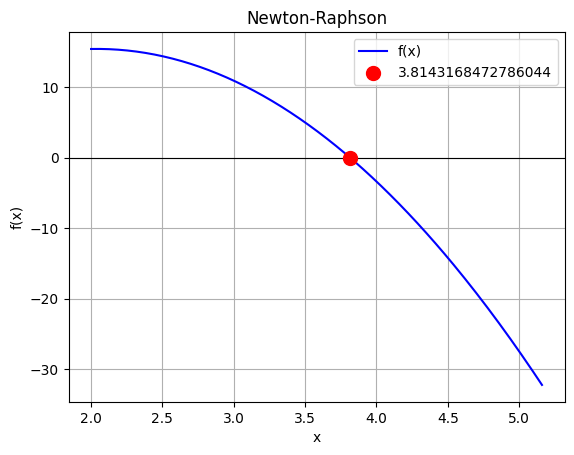

In [71]:
nr = NewtonRaphson(
    function = lambda x:-4.9*x**2+20*x-5,
    derivative = lambda x:-9.8*x+20,
    initialSock = 3,
    number_iterations = 3
)
nr.plot()

### Exercício 2: Corrente em Circuito Elétrico Não Linear (Método de Newton-Raphson)
* Contexto: Em um circuito elétrico com um componente não linear, a relação entre a corrente
I e a tensão V pode ser complexa. Suponha que a tensão V em um ponto do circuito seja dada
pela equação V (I) = I3 + 2I − 5. Queremos encontrar a corrente I para uma tensão específica de
V = 10 Volts.
* Problema: Encontre a corrente I para a qual V (I) = 10, ou seja, a raiz de f (I) = I3 +2I −15 = 0.
Use o Método de Newton-Raphson com um chute inicial I0 = 2 Amperes. Aplique o critério de
parada com um erro aproximado Ea < 0.001.
* Dica Python: Implemente o método em Python, exibindo as iterações e o valor final de I que
satisfaz o critério de parada

          X         Y
0  2.000000  -3.00000
1  2.214286   0.28535
2  2.197208   0.00193
3  2.197091   0.00000


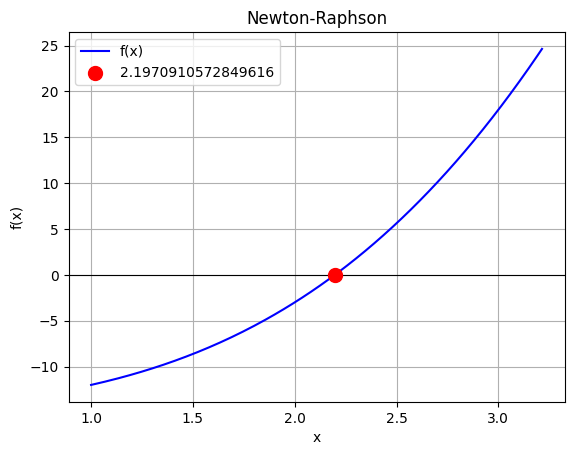

In [72]:
nr = NewtonRaphson(
    function = lambda i:i**3+2*i-15,
    derivative = lambda i:3*i**2+2,
    initialSock = 2,
    number_iterations = 3
)
nr.plot()

### Exercício 3: Taxa de Juros para Valor Futuro de Investimento (Comparação de Métodos
para Raízes)
* Contexto: Uma pessoa está planejando um investimento e quer saber a taxa de juros necessária
para atingir um valor futuro específico em um determinado período. A equação do valor futuro
com juros compostos contínuos é F V = P V · ert.
* Problema: Se o Valor Presente (P V ) é R$ 1000, o Valor Futuro (F V ) desejado é R$ 1500,
e o tempo (t) é de 5 anos, queremos encontrar a taxa de juros r. Ou seja, a raiz de f (r) =
1000e5r − 1500 = 0.
* Representação Gráfica: Represente graficamente a função f (r) e compare visualmente a con-
vergência de ambos os métodos, destacando a velocidade de cada um.
* Discussão: Qual método parece convergir mais rapidamente para este problema? Qual seria mais
adequado para um cenário onde a derivada da função é fácil de calcula
#### a) Use o Método da Bisseção no intervalo [0.05, 0.1] para encontrar a raiz. Realize 4 iterações.


                                             X          Y0          Y1
0                                  (0.05, 0.1) -215.974583  148.721271
1                   (0.07500000000000001, 0.1)  -45.008585  148.721271
2   (0.07500000000000001, 0.08750000000000001)  -45.008585   48.830299
3   (0.07500000000000001, 0.08125000000000002)  -45.008585    1.177800
4   (0.07812500000000001, 0.08125000000000002)  -22.095805    1.177800
5   (0.07968750000000002, 0.08125000000000002)  -10.504458    1.177800
6   (0.08046875000000002, 0.08125000000000002)   -4.674738    1.177800
7   (0.08085937500000001, 0.08125000000000002)   -1.751326    1.177800
8   (0.08105468750000001, 0.08125000000000002)   -0.287478    1.177800
9   (0.08105468750000001, 0.08115234375000002)   -0.287478    0.444982
10  (0.08105468750000001, 0.08110351562500001)   -0.287478    0.078707


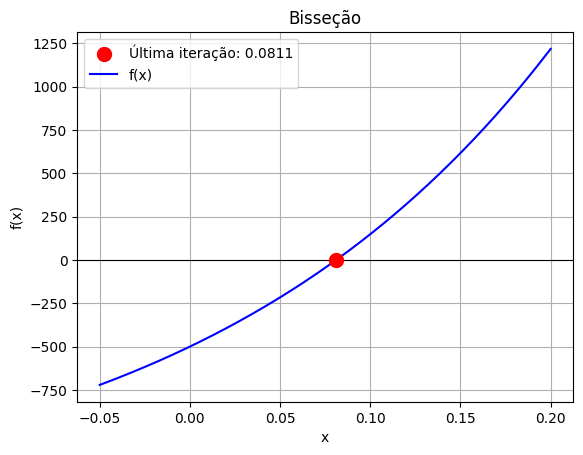

In [73]:
function_ex3 = lambda r:1000*math.e**(5*r)-1500
b = Bissecao(
    function = function_ex3,
    intervalo = (0.05,0.1),
    number_iterations = 10
)
b.plot()

#### b) Use o Método de Newton-Raphson com chute inicial r0 = 0.08 para encontrar a raiz. Realize 3 iterações.

          X         Y
0  0.080000  -8.17530
1  0.081096   0.02244
2  0.081093   0.00000
3  0.081093   0.00000


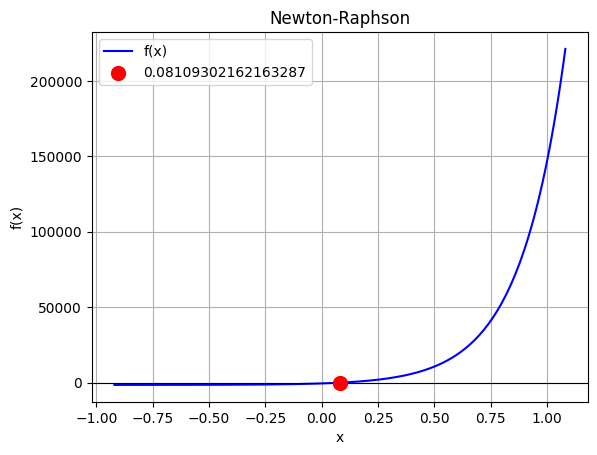

In [74]:
nr = NewtonRaphson(
    function = function_ex3,
    derivative = lambda r:5000*math.e**(5*r),
    initialSock = 0.08,
    number_iterations = 3
)
nr.plot()

### Exercício 4: Otimização de Hiperparâmetros em Modelos de Machine Learning (Método
de Newton-Raphson)
* Contexto: Em Machine Learning, a escolha de hiperparâmetros (como a taxa de aprendizado) é
crucial para o desempenho do modelo. Frequentemente, buscamos o valor de um hiperparâmetro
que minimize uma função de custo ou erro. Suponha que a função de custo J(α) em relação à taxa
de aprendizado α seja modelada por J(α) = α3 − 2.5α2 + 0.5α + 0.1. Para encontrar o valor ótimo
de α, precisamos encontrar onde a derivada de J(α) é zero.
* Problema: Encontre a raiz da função J′(α) = 3α2 − 5α + 0.5 = 0 usando o Método de Newton-
Raphson. Utilize um chute inicial α0 = 1.5. Realize 3 iterações e apresente o valor final de α.
* Representação Gráfica: Represente graficamente a função J′(α) e as iterações do método de
Newton-Raphson, mostrando como ele se aproxima da raiz

          X         Y
0  1.500000  -0.25000
1  1.562500   0.01172
2  1.559821   0.00002
3  1.559816   0.00000


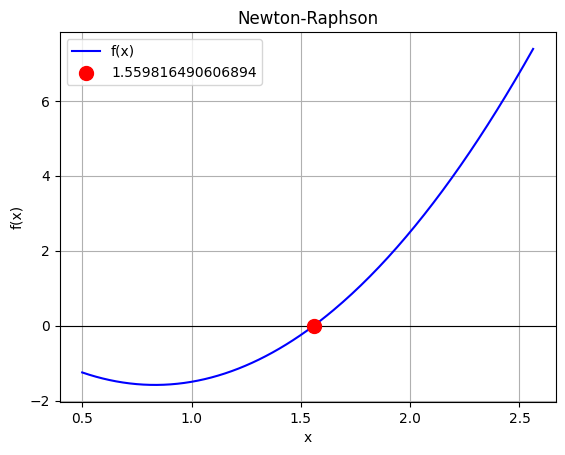

In [75]:
nr = NewtonRaphson(
    function = lambda lamb:3*lamb**2-5*lamb+0.5,
    derivative = lambda lamb:6*lamb-5,
    initialSock = 1.5,
    number_iterations = 3
)
nr.plot()

### Exercício 5: Determinação de Limiar para Classificador Binário (Método da Bisseção)
* Contexto: Em problemas de classificação binária (e.g., detecção de spam, diagnóstico médico),
um modelo de IA geralmente produz uma probabilidade. Para tomar uma decisão (spam/não
spam), um limiar é aplicado a essa probabilidade. A função de custo associada a esse limiar pode
ser complexa, e encontrar o limiar ideal pode envolver encontrar um zero de uma função.
* Problema: Suponha que a função de custo C(T ) para um limiar T seja dada por C(T ) = sin(T ) −
T /2 + 0.1, onde T está no intervalo [0, π/2]. Encontre um limiar T onde o custo é zero, ou seja,
a raiz de C(T ) = 0, usando o Método da Bisseção no intervalo [0.5, 1.5]. Realize 4 iterações e
apresente o intervalo final.
* Representação Gráfica: Represente graficamente a função C(T ) e os intervalos de busca a cada
iteração, destacando a convergência para a raiz.

                              X        Y0        Y1
0                    (0.5, 1.5)  0.329426  0.347495
1                    (1.5, 1.0)  0.347495  0.441471
2                   (1.0, 1.25)  0.441471  0.423985
3                 (1.25, 1.125)  0.423985  0.439768
4               (1.125, 1.1875)  0.439768  0.433687
5             (1.1875, 1.15625)  0.433687  0.437174
6           (1.15625, 1.171875)  0.437174  0.435543
7         (1.171875, 1.1640625)  0.435543  0.436387
8       (1.1640625, 1.16796875)  0.436387  0.435972
9     (1.16796875, 1.166015625)  0.435972  0.436181
10  (1.166015625, 1.1669921875)  0.436181  0.436077


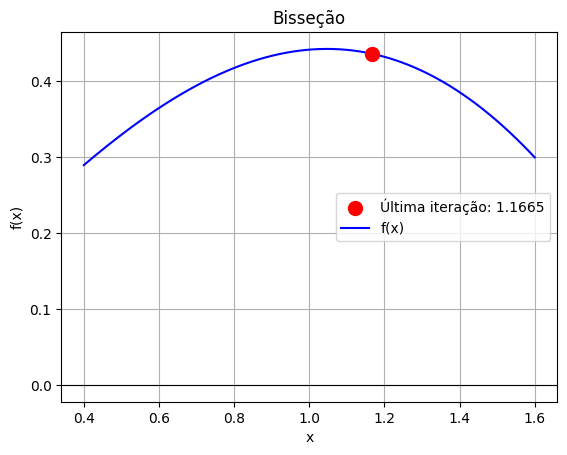

In [76]:
# intervalo incoerente, abaixo coloco em (-0.5,0.5)
b = Bissecao(
    function = lambda t:math.sin(t)-t/2+0.1,
    intervalo = (0.5,1.5),
    number_iterations = 10
)
b.plot()

                             X        Y0        Y1
0                  (-0.5, 0.5) -0.129426  0.329426
1                  (-0.5, 0.0) -0.129426  0.100000
2                 (-0.25, 0.0) -0.022404  0.100000
3              (-0.25, -0.125) -0.022404  0.037825
4             (-0.25, -0.1875) -0.022404  0.007347
5          (-0.21875, -0.1875) -0.007635  0.007347
6         (-0.203125, -0.1875) -0.000169  0.007347
7      (-0.203125, -0.1953125) -0.000169  0.003583
8     (-0.203125, -0.19921875) -0.000169  0.001706
9    (-0.203125, -0.201171875) -0.000169  0.000768
10  (-0.203125, -0.2021484375) -0.000169  0.000300


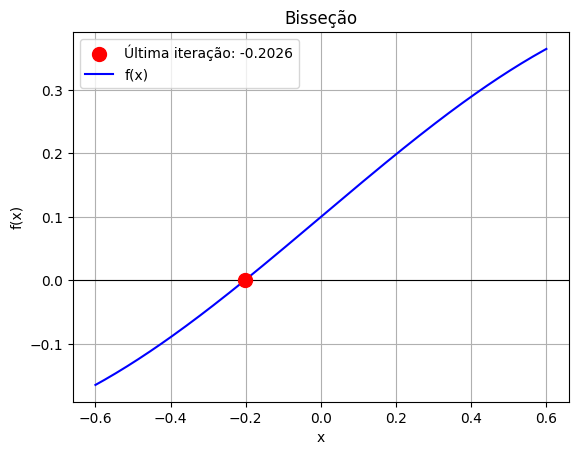

In [77]:
intervalo_coerente = Bissecao(
    function = lambda t:math.sin(t)-t/2+0.1,
    intervalo = (-0.5,0.5),
    number_iterations = 10
)
intervalo_coerente.plot()

## Seção 2: Interpolação Polinomial (Lagrange e Newton)


In [78]:
# Interpolacao polinomial
class Lagrange():
    def __init__(self,x,points):
        self.x = x
        self.x_points, self.y_points = zip(*points)
        

    def L(self,j,x):
        L = math.prod(
            [
                (x-self.x_points[k])/
                (self.x_points[j]-self.x_points[k])
                for k in range(len(self.x_points)) 
                if k != j
            ]
        )
        # print(f'L{j}:{L}')
        return L
    def l(self,x):

        return sum(
            [
                Y*self.L(j,x)
                for j,Y in enumerate(self.y_points)
            ]
        )

    def plot(self):
        columns = [f"L{j}(x)" for j in range(len(self.x_points))]+['P(X)']
        data = [[self.L(j, x) for j in range(len(self.x_points))]+[self.l(x)] for x in self.x]
        df = pd.DataFrame(data, columns=columns, index=[f"x={val}" for val in self.x])
        print(df)
        x_vals = np.linspace(min(self.x_points)-(max(self.x_points)-min(self.x_points)), max(self.x_points)+(max(self.x_points)-min(self.x_points)), 200)
        y_vals = [self.l(x) for x in x_vals]
        plt.scatter(self.x_points, self.y_points, color='red', s=50, zorder=5, label='Pontos')
        plt.scatter(self.x,[self.l(x) for x in self.x],color = 'orange',s=50,zorder=5,label = 'Alvos')
        plt.plot(x_vals,y_vals,color = 'blue',label = 'Lagrange')
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title("Lagrange")
        plt.grid(True)
        plt.legend()
        plt.show() 

class Newton():
    def __init__(self, x, points):
        self.x = x
        self.x_points, self.y_points = zip(*points)
        n = len(points)
        self.table = pd.DataFrame(points, columns=['X', 'F|X0|'])
        # j = coluna
        # i = linhas
        for j in range(1, n):
            col_name = 'F|' + ','.join(f'x{i}' for i in range(j+1)) + '|'
            self.table[col_name] = [
                (self.table.iloc[i+1,j] - self.table.iloc[i,j]) / (self.x_points[i+j] - self.x_points[i])
                if i < n - j else None
                for i in range(n)
            ]
        print(self.table)
    def n(self, x):
        # P(x) = f[x0] + f[x0,x1](x-x0) + f[x0,x1,x2](x-x0)(x-x1) + ...
        result = self.table.iloc[0, 1]  # f[x0]
        
        for j in range(1, len(self.x_points)):
            # Coeficiente f[x0,x1,...,xj]
            coeff = self.table.iloc[0, j+1]
            
            # Termo (x-x0)(x-x1)...(x-x_{j-1})
            term = 1
            for i in range(j):
                term *= (x - self.x_points[i])
            
            result += coeff * term
        
        return result

    def plot(self):
        x_vals = np.linspace(min(self.x_points)-(max(self.x_points)-min(self.x_points)), max(self.x_points)+(max(self.x_points)-min(self.x_points)), 200)
        y_vals = [self.n(x) for x in x_vals]
        columns = ['X', 'P(X)']
        dados = [(x, self.n(x)) for x in self.x] 
        print(pd.DataFrame(dados, columns=columns))
        plt.scatter(self.x_points, self.y_points, color='red', s=50, zorder=5, label='Pontos')
        plt.scatter(self.x,[self.n(x) for x in self.x],color = 'orange',s=50,zorder=5,label = 'Alvos')
        plt.plot(x_vals,y_vals,color = 'blue',label = 'Newton')
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title("Newton")
        plt.grid(True)
        plt.legend()
        plt.show()   


### Exercício 6: Concentração de Reagente Químico (Interpolação de Lagrange)
* Contexto: Em um experimento de química, a concentração de um reagente foi medida em dife-
rentes tempos. Queremos estimar a concentração em um tempo intermediário sem realizar uma
nova medição, para otimizar o processo.
* Problema: Dados os pontos (Tempo em minutos, Concentração em mol/L): (0, 1.0), (2, 0.8),
(5, 0.4). Use a Interpolação de Lagrange para estimar a concentração no Tempo t = 3 minutos.
* Representação Gráfica: Plote os pontos dados e o polinômio interpolador de Lagrange resul-
tante. Destaque o ponto estimado no gráfico. Dica Python: Crie uma função em Python para
calcular os polinômios de base Lj (x) e o polinômio interpolador P (x).

     L0(x)  L1(x)  L2(x)  P(X)
x=3   -0.2    1.0    0.2  0.68


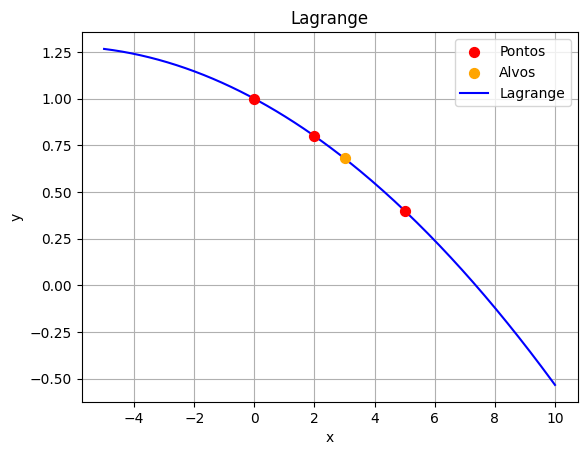

In [79]:
points = [
    (0, 1.0), 
    (2, 0.8),
    (5, 0.4)
]
x = [3]
l = Lagrange(x,points)
l.plot()

### Exercício 7: Temperatura do Solo em Diferentes Profundidades (Interpolação de Newton)
* Contexto: Meteorologistas e cientistas do solo coletam dados de temperatura do solo em diferentes
profundidades para entender a transferência de calor e modelar o clima local. Eles precisam estimar
a temperatura em profundidades não medidas diretamente.
* Problema: Dados os pontos (Profundidade em metros, Temperatura em °C): (0, 25), (0.5, 22),
(1.0, 19), (1.5, 17). Construa o polinômio interpolador de Newton e use-o para estimar a tempera-
tura na Profundidade de 0.75 metros.
* Representação Gráfica: Plote os pontos de dados e o polinômio interpolador de Newton, visu-
alizando a variação da temperatura com a profundidade.
* Dica Python: Implemente a construção da tabela de diferenças divididas em Pytho

     X  F|X0|  F|x0,x1|  F|x0,x1,x2|  F|x0,x1,x2,x3|
0  0.0     25      -6.0          0.0        1.333333
1  0.5     22      -6.0          2.0             NaN
2  1.0     19      -4.0          NaN             NaN
3  1.5     17       NaN          NaN             NaN
      X     P(X)
0  0.75  20.4375


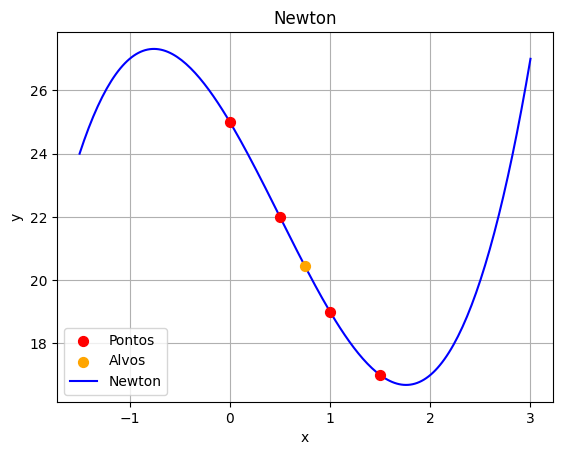

In [80]:
points = [
    (0, 25), 
    (0.5, 22),
    (1, 19),
    (1.5, 17)
]
x = [0.75]
n = Newton(x,points)
n.plot()

## Exercício 8: Demanda por um Novo Produto (Interpolação de Lagrange)
* Contexto: Uma empresa de marketing está analisando a demanda por um novo produto em
diferentes pontos de preço. Eles querem estimar a demanda para um preço que não foi testado, a
fim de definir a estratégia de vendas.
* Problema: Dados os pontos (Preço em R$, Demanda em unidades): (10, 500), (15, 400), (20, 320).
Use a Interpolação de Lagrange para estimar a demanda para um Preço de R$ 12.
* Representação Gráfica: Plote os pontos de dados e o polinômio interpolador, mostrando a
demanda estimada.

      L0(x)  L1(x)  L2(x)   P(X)
x=12   0.48   0.64  -0.12  457.6


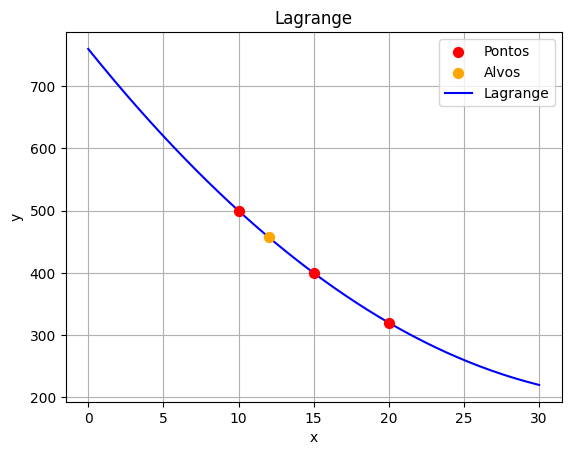

In [81]:
points = [
    (10, 500), 
    (15, 400),
    (20, 320),
    
]
x = [12]
l = Lagrange(x,points)
l.plot()

## Exercício 9: Modelagem de Sentimento em Análise de Redes Sociais (Interpolação de Newton)
* Contexto: Em processamento de linguagem natural (PNL), a análise de sentimento é usada para
entender a polaridade emocional de um texto. Ao monitorar o sentimento de discussões online
sobre um tópico ao longo do tempo, podemos ter dados discretos e precisar estimar o sentimento
em momentos intermediários.
* Problema: Suponha que o sentimento médio (escala de -1 a 1) de tweets sobre um evento foi
registrado em dias específicos: (Dia 1, Sentimento 0.6), (Dia 3, Sentimento 0.4), (Dia 5, Sentimento
0.75). Use a Interpolação de Newton para estimar o sentimento médio no Dia 2 e no Dia 4.
* Representação Gráfica: Plote os pontos de dados e o polinômio interpolador de Newton, visu-
alizando a variação do sentimento ao longo do tempo.
* Dica Python: Implemente a construção da tabela de diferenças divididas em Python para este
problema.

   X  F|X0|  F|x0,x1|  F|x0,x1,x2|
0  1   0.60    -0.100      0.06875
1  3   0.40     0.175          NaN
2  5   0.75       NaN          NaN
   X     P(X)
0  2  0.43125
1  4  0.50625


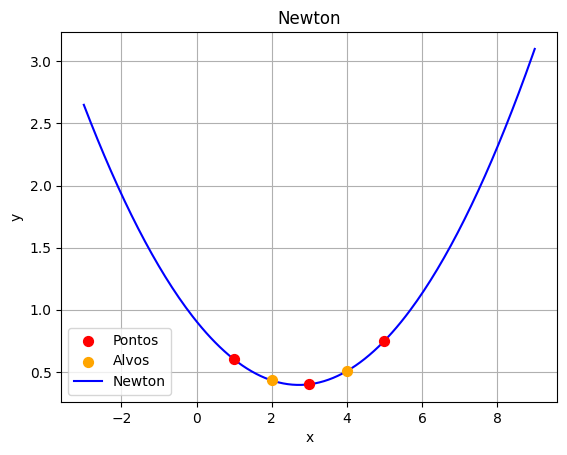

In [82]:
points = [
    (1, 0.6), 
    (3, 0.4),
    (5, 0.75),
]
x = [2,4]
n = Newton(x,points)
n.plot()

### Exercício 10: Geração de Curvas para Design Gráfico (Interpolação de Lagrange e Newton)
* Contexto: Em design gráfico, animação ou engenharia de superfícies, muitas vezes é necessário
criar curvas suaves que passem por pontos de controle específicos. A interpolação polinomial pode
ser usada para gerar essas curvas de forma programática.
* Problema: Você tem um conjunto de pontos de controle para uma curva (Coordenada X, Coor-
denada Y): (0, 0), (1, 2), (3, 1), (4, 3).
* Discussão: Embora ambos os métodos gerem o mesmo polinômio interpolador, qual seria a van-
tagem de usar o método de Newton se você precisasse adicionar um novo ponto de controle (por
exemplo, (5, 0)) e recalcular a curva? Justifique sua resposta com base nas propriedades de cada
método.
3

#### a) Use a Interpolação de Lagrange para encontrar o polinômio que descreve a coordenada Y em função da coordenada X. Estime Y para X = 2.

        L0(x)     L1(x)     L2(x)     L3(x)  P(X)
x=2 -0.166667  0.666667  0.666667 -0.166667   1.5


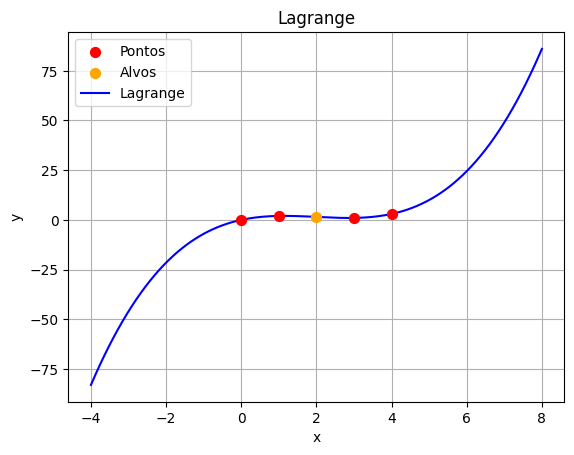

In [83]:
points = [
    (0,0), 
    (1,2),
    (3,1),
    (4,3)
    
]
x = [2]
l = Lagrange(x,points)
l.plot()
# L0(x)     L1(x)     L2(x)     L3(x)  P(X)
# x=2 -0.166667  0.666667  0.666667 -0.166667   1.5

#### b) Use a Interpolação de Newton para encontrar o polinômio que descreve a coordenada Y em função da coordenada X. Estime Y para X = 2.5.

   X  F|X0|  F|x0,x1|  F|x0,x1,x2|  F|x0,x1,x2,x3|
0  0      0       2.0    -0.833333        0.416667
1  1      2      -0.5     0.833333             NaN
2  3      1       2.0          NaN             NaN
3  4      3       NaN          NaN             NaN
     X     P(X)
0  2.5  1.09375


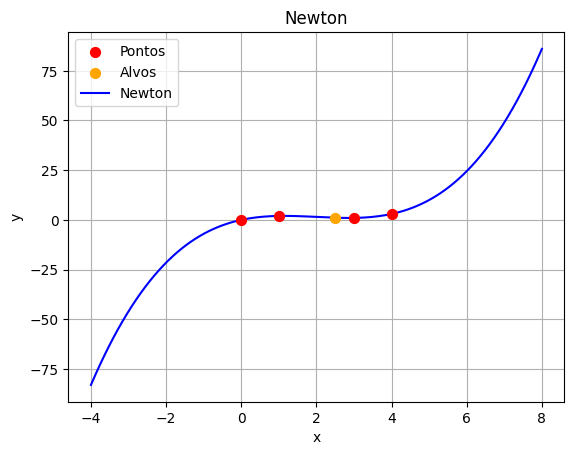

In [84]:
x = [2.5]
n = Newton(x,points)
n.plot()